In [1]:
# Description: This quantum teleportation code demonstrates the transfer of information from qubit 0 to qubit 2
# through the entanglement and measurement of an auxiliary qubit (qubit 1). The teleportation process relies
# on the principles of entanglement and quantum measurement to faithfully transmit quantum information. The final
# histogram shows the successful transfer of the quantum state.

# Import necessary modules from Qiskit
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline

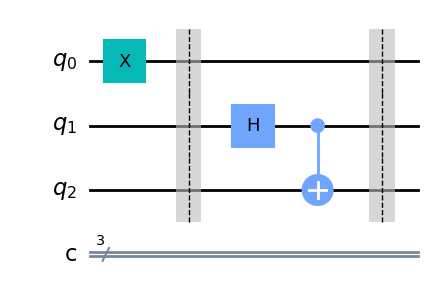

In [2]:
# Create a quantum circuit with 3 qubits and 3 classical bits
circuit = QuantumCircuit(3, 3)

# Apply an X gate (bit-flip) to qubit 0
circuit.x(0)
# Explanation: Prepare an arbitrary state on qubit 0, representing the information to be teleported.

# Insert a barrier for clarity
circuit.barrier()

# Apply a Hadamard gate to qubit 1
circuit.h(1)
# Explanation: Entangle qubit 1 with a Hadamard gate. This prepares an entangled state that will facilitate teleportation.

# Apply a CNOT gate with qubit 1 as control and qubit 2 as target
circuit.cx(1, 2)
# Explanation: Create entanglement between qubit 1 and qubit 2, forming a Bell pair.

# Insert a barrier for clarity
circuit.barrier()

circuit.draw(output='mpl')

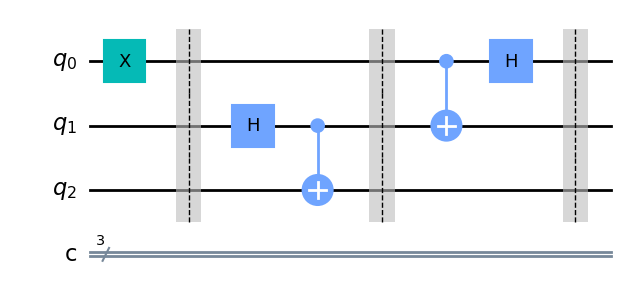

In [3]:
# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
circuit.cx(0, 1)
# Explanation: Apply a CNOT gate between the state to be teleported (qubit 0) and the entangled qubit (qubit 1).

# Apply a Hadamard gate to qubit 0
circuit.h(0)
# Explanation: Apply a Hadamard gate to qubit 0, completing the teleportation protocol.

# Insert a barrier for clarity
circuit.barrier()

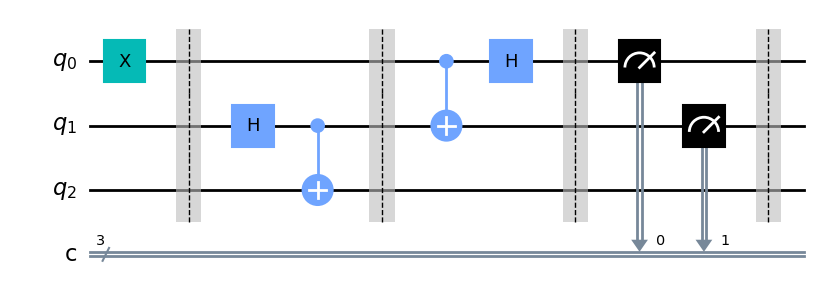

In [4]:
# Measure qubits 0 and 1 and map the results to classical bits 0 and 1
circuit.measure([0, 1], [0, 1])
# Explanation: Perform measurements on the state to be teleported (qubit 0) and the entangled qubit (qubit 1).

# Insert a barrier for clarity
circuit.barrier()

circuit.draw(output='mpl')

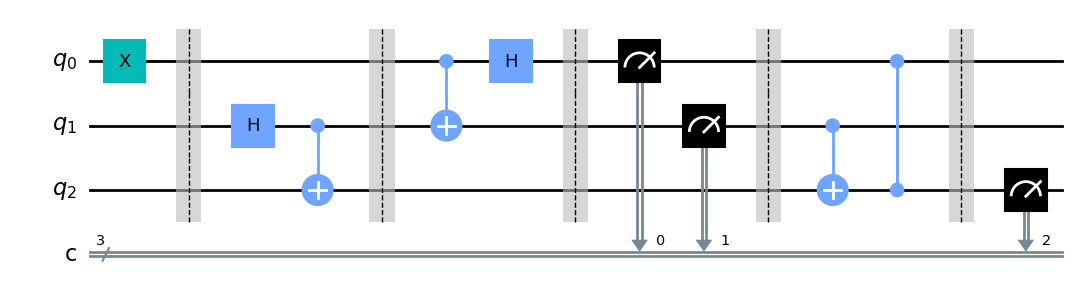

In [5]:
# Apply a CNOT gate with qubit 1 as control and qubit 2 as target
circuit.cx(1, 2)
# Explanation: Use the measurement results from qubits 0 and 1 to perform corrections on qubit 2.

# Apply a controlled-Z gate with qubit 0 as control and qubit 2 as target
circuit.cz(0, 2)
# Explanation: Use the measurement result from qubit 0 to correct qubit 2 based on the Bell pair entanglement.

# Insert a barrier for clarity
circuit.barrier()

# Measure qubit 2 and map the result to classical bit 2
circuit.measure([2], [2])
# Explanation: Measure the final state of the teleported qubit (qubit 2) and store the result in a classical bit.

circuit.draw(output='mpl')

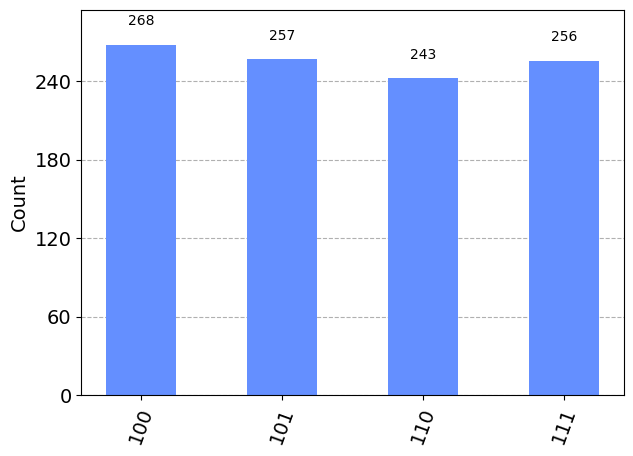

In [6]:
# Define the QASM simulator as the backend
simulator = Aer.get_backend('qasm_simulator')

# Execute the quantum circuit on the simulator with 1024 shots
result = execute(circuit, backend=simulator, shots=1024).result()

# Plot a histogram to visualize the measurement results
plot_histogram(result.get_counts(circuit))
# Explanation: Display a histogram representing the measurement outcomes, showing the success of the teleportation.